<a href="https://colab.research.google.com/github/Viny2030/NLP/blob/main/ejemplo_tokenizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenización

In [31]:

%load_ext Cython

In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/df_total.csv', encoding='UTF-8')

In [4]:
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


In [5]:
df["news"][3]

'Con el dato de marzo el IPC interanual encadena su decimoquinta tasa positiva consecutiva. La inflación publicada por el INE se ha mantenido igual respecto al avance del 30 de marzo y se sitúa 22 puntos por encima del dato de febrero que ascendió al 76.De esos 22 puntos de diferencia la mayor parte la colocó el grupo de la vivienda 09 puntos por la subida de la electricidad y el del transporte 07 puntos por el alza de los carburantes. También impulsaron el IPC de marzo el aumento de los precios de la restauración y los servicios de alojamiento y al encarecimiento generalizado de los alimentos especialmente del pescado y el marisco de la carne de las legumbres y hortalizas y de la leche el queso y los huevos.Sin tener en cuenta la rebaja del impuesto especial sobre la electricidad y las variaciones sobre otros impuestos el IPC interanual alcanzó en marzo 107 nueve décimas más que la tasa general del 98. Así lo refleja el IPC a impuestos constantes que el INE también publica en el marco

In [6]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news']
y = df['Type']

In [7]:
print(df['Type'].value_counts())

Type
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train

,news
1120,La inversión sostenible no solo prioriza el be...
842,BBVA Trader el canal online que BBVA pone a se...
843,Basta un dato para entender la importancia de ...
620,La necesidad de cumplir con el aislamiento obl...
570,La senadora colorada Carmen Sanguinetti y el n...
...,...
171,El pasado 18 de diciembre el Gobierno Nacional...
670,El nuevo informe de BBVA Research ajusta las p...
269,Las difíciles condiciones de encierro y movili...
910,La reunión de la Reserva Federal que se realiz...


In [11]:
X_test

,news
690,El consumo con tarjetas en la primera mitad de...
267,Carlos Serrano Herrera economista en Jefe de B...
295,Bbva reveló el Consumption Tracker con cierre ...
967,El Departamento Administrativo Nacional de Est...
277,El suprarreciclaje es transformar un desecho e...
...,...
717,Existen muchos retos para los modelos de vivie...
680,La Bolsa Mercantil de Colombia BMC y Seedstars...
771,Para celebrar el Día Nacional del Tendero la F...
15,JPMorgan dijo el lunes que los cambios regulat...


In [12]:
y_train

,Type
1120,Sostenibilidad
842,Macroeconomia
843,Sostenibilidad
620,Regulaciones
570,Regulaciones
...,...
171,Regulaciones
670,Macroeconomia
269,Regulaciones
910,Macroeconomia


In [13]:
y_test

,Type
690,Otra
267,Macroeconomia
295,Otra
967,Macroeconomia
277,Sostenibilidad
...,...
717,Regulaciones
680,Alianzas
771,Alianzas
15,Regulaciones


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
vectorizer = CountVectorizer()

In [16]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [17]:
X_train_transformed

<973x26680 sparse matrix of type '<class 'numpy.int64'>'
	with 236699 stored elements in Compressed Sparse Row format>

In [18]:
X_train_transformed_dense = X_train_transformed.toarray()
print(X_train_transformed_dense)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [20]:
model = MultinomialNB()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
print(metrics.accuracy_score(y_test, y_pred))

0.7704918032786885


# Stemming

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stemmer = SnowballStemmer('spanish')

In [24]:
def tokenize_and_stem(text):
    tokens = word_tokenize(text.lower())
    stems = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return ' '.join(stems)

In [25]:
df['news_stemmer'] = df['news'].apply(tokenize_and_stem)

In [ ]:
df['news_stemmer']

0       durant el for la banc articul empresarial par ...
1       el regul de valor de chin dij el doming que bu...
2       en una industri histor masculin com lo es la a...
3       con el dat de marz el ipc interanual encaden s...
4       ayer en cartagen se dio inici a la version num...
                              ...                        
1212    en la vid de tod empres emergent lleg un momen...
1213    la espiral alcist de los preci continu y gener...
1214    las grand derrot nacional son experient trauma...
1215    bbva ha alcanz un acuerd de colabor con barcel...
1216    casi entrand a la part final de noviembr la ep...
Name: news_stemmer, Length: 1217, dtype: object

In [26]:
print(df['news_stemmer'][3])

con el dat de marz el ipc interanual encaden su decimoquint tas posit consecut la inflacion public por el ine se ha manten igual respect al avanc del de marz y se situ punt por encim del dat de febrer que ascend al esos punt de diferent la mayor part la coloc el grup de la viviend punt por la sub de la electr y el del transport punt por el alza de los carbur tambien impuls el ipc de marz el aument de los preci de la restaur y los servici de aloj y al encarec generaliz de los aliment especial del pesc y el marisc de la carn de las legumbr y hortaliz y de la lech el ques y los ten en cuent la rebaj del impuest especial sobr la electr y las variacion sobr otros impuest el ipc interanual alcanz en marz nuev decim mas que la tas general del asi lo reflej el ipc a impuest constant que el ine tambien public en el marc de esta inflacion subyacent sin aliment no elabor ni product energet aument en marz cuatr decim hast su valor mas alto desd septiembr de de este mod la subyacent se situ mas de 

In [27]:
print(df['news'][3])

Con el dato de marzo el IPC interanual encadena su decimoquinta tasa positiva consecutiva. La inflación publicada por el INE se ha mantenido igual respecto al avance del 30 de marzo y se sitúa 22 puntos por encima del dato de febrero que ascendió al 76.De esos 22 puntos de diferencia la mayor parte la colocó el grupo de la vivienda 09 puntos por la subida de la electricidad y el del transporte 07 puntos por el alza de los carburantes. También impulsaron el IPC de marzo el aumento de los precios de la restauración y los servicios de alojamiento y al encarecimiento generalizado de los alimentos especialmente del pescado y el marisco de la carne de las legumbres y hortalizas y de la leche el queso y los huevos.Sin tener en cuenta la rebaja del impuesto especial sobre la electricidad y las variaciones sobre otros impuestos el IPC interanual alcanzó en marzo 107 nueve décimas más que la tasa general del 98. Así lo refleja el IPC a impuestos constantes que el INE también publica en el marco 

In [28]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news_stemmer']
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Medimos el rendimiento del modelo
y_pred = model.predict(X_test_transformed)

print(metrics.accuracy_score(y_test, y_pred))

0.7704918032786885


In [29]:
X_train_transformed

<973x11759 sparse matrix of type '<class 'numpy.int64'>'
	with 192909 stored elements in Compressed Sparse Row format>

# Lemmatization

In [30]:
import spacy

In [33]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 59.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
import urllib.request
import spacy

In [35]:
nlp = spacy.load('es_core_news_sm')

In [36]:
def lemmatize_text(text):
    doc = nlp(text.lower())
    lemmas = [token.lemma_ for token in doc if token.is_alpha]
    return ' '.join(lemmas)

In [37]:
df['news_lemma'] = df['news'].apply(lemmatize_text)

In [38]:
df['news_lemma']

,news_lemma
0,durante el foro el banca articulador empresari...
1,el regulador de valor de china decir el doming...
2,en uno industria históricamente masculino como...
3,con el dato de marzo el ipc interanual encaden...
4,ayer en cartagena él dar inicio a el versión n...
...,...
1212,en el vida de todo empresa emergente llegar un...
1213,el espiral alcista de el precio continuar y ge...
1214,el grande derrota nacional ser experiencia tra...
1215,bbva haber alcanzar uno acuerdo de colaboració...


In [39]:
df['news_lemma'][3]

'con el dato de marzo el ipc interanual encadenar su decimoquinto tasa positivo consecutivo el inflación publicado por el ine él haber mantener igual respecto al avance del de marzo y él situar punto por encima del dato de febrero que ascender al ese punto de diferencia el mayor parte él colocar el grupo de el vivienda punto por el subida de el electricidad y el del transporte punto por el alza de el carburante también impulsar el ipc de marzo el aumento de el precio de el restauración y el servicio de alojamiento y al encarecimiento generalizado de el alimento especialmente del pescado y el marisco de el carne de el legumbr y hortaliza y de el leche el queso y el tener en cuenta el rebaja del impuesto especial sobre el electricidad y el variación sobre otro impuesto el ipc interanual alcanzar en marzo nueve décima más que el tasa general del así él reflejar el ipc a impuesto constante que el ine también publicar en el marco de este inflación subyacente sin alimento no elaborado ni pro

In [40]:
# Separamos los datos en variables de entrada y etiquetas
X = df['news_lemma']
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Medimos el rendimiento del modelo
y_pred = model.predict(X_test_transformed)

print(metrics.accuracy_score(y_test, y_pred))

0.8401639344262295


In [41]:
X_train_transformed

<973x16606 sparse matrix of type '<class 'numpy.int64'>'
	with 192967 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score  # Import cross_val_score for evaluation
import numpy as np # Import numpy for calculations

# Define the benchmark function
def benchmark(clf, name):
    """
    Benchmarks a given classifier using cross-validation and returns the results.

    Args:
        clf: The classifier object.
        name: The name of the classifier.

    Returns:
        A dictionary containing the classifier name and its mean accuracy score.
    """
    scores = cross_val_score(clf, X_train_transformed, y_train, cv=5)  # 5-fold cross-validation
    print("cross_val_score(train):", scores)
    print("mean:", np.mean(scores))
    return {"classifier": name, "accuracy": np.mean(scores)}

results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # L2 penalty Linear SGD
    (
        SGDClassifier(
            loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
        ),
        "log-loss SGD",
    ),
    # NearestCentroid (aka Rocchio classifier)
    (NearestCentroid(), "NearestCentroid"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
cross_val_score(train): [0.81538462 0.8        0.76410256 0.79896907 0.86082474]
mean: 0.8078561987840338
kNN
cross_val_score(train): [0.47692308 0.44102564 0.42564103 0.45360825 0.40721649]
mean: 0.440882897171557
Random Forest
cross_val_score(train): [0.73846154 0.79487179 0.77435897 0.77835052 0.83505155]
mean: 0.7842188739095955
Linear SVC
cross_val_score(train): [0.85128205 0.82564103 0.80512821 0.82474227 0.89175258]
mean: 0.8397092254824214
log-loss SGD
cross_val_score(train): [0.59487179 0.62564103 0.44102564 0.67010309 0.51546392]
mean: 0.569421094369548
NearestCentroid
cross_val_score(train): [0.34871795 0.36410256 0.32820513 0.39690722 0.30412371]
mean: 0.34841131377213846
Complement naive Bayes
cross_val_score(train): [0.82051282 0.77435897 0.71794872 0.79381443 0.75773196]
mean: 0.772873380914618


https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC

results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # L2 penalty Linear SGD
    (
        SGDClassifier(
            loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
        ),
        "log-loss SGD",
    ),
    # NearestCentroid (aka Rocchio classifier)
    (NearestCentroid(), "NearestCentroid"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))


Logistic Regression
cross_val_score(train): [0.81538462 0.8        0.76410256 0.79896907 0.86082474]
mean: 0.8078561987840338
kNN
cross_val_score(train): [0.47692308 0.44102564 0.42564103 0.45360825 0.40721649]
mean: 0.440882897171557
Random Forest
cross_val_score(train): [0.74358974 0.74871795 0.72307692 0.78350515 0.80927835]
mean: 0.7616336241078508
Linear SVC
cross_val_score(train): [0.85128205 0.82564103 0.80512821 0.82474227 0.89175258]
mean: 0.8397092254824214
log-loss SGD
cross_val_score(train): [0.76410256 0.64102564 0.68205128 0.81443299 0.22164948]
mean: 0.6246523922812581
NearestCentroid
cross_val_score(train): [0.34871795 0.36410256 0.32820513 0.39690722 0.30412371]
mean: 0.34841131377213846
Complement naive Bayes
cross_val_score(train): [0.82051282 0.77435897 0.71794872 0.79381443 0.75773196]
mean: 0.772873380914618


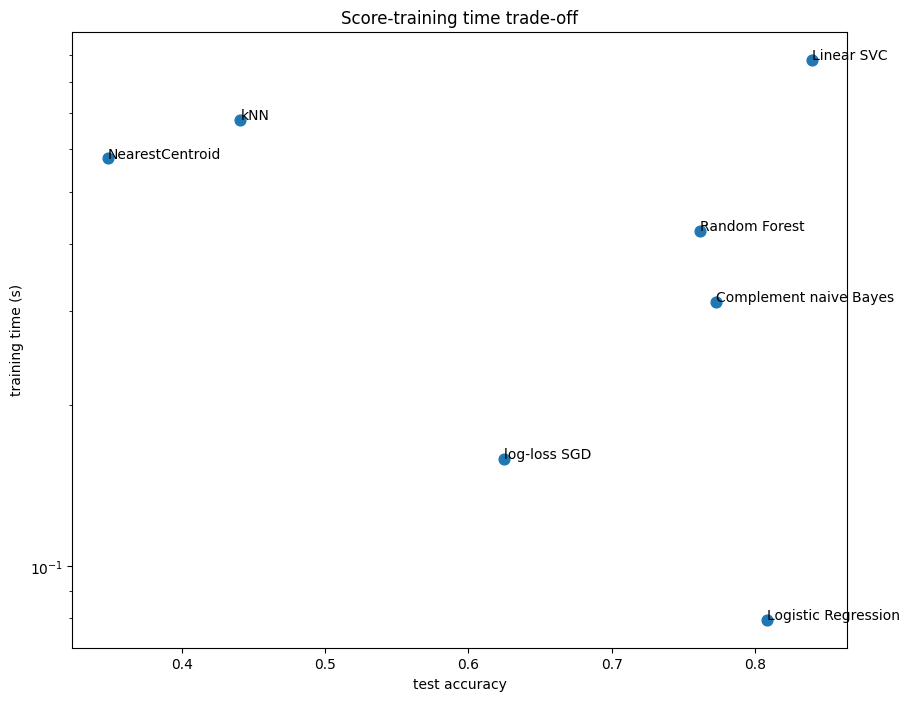

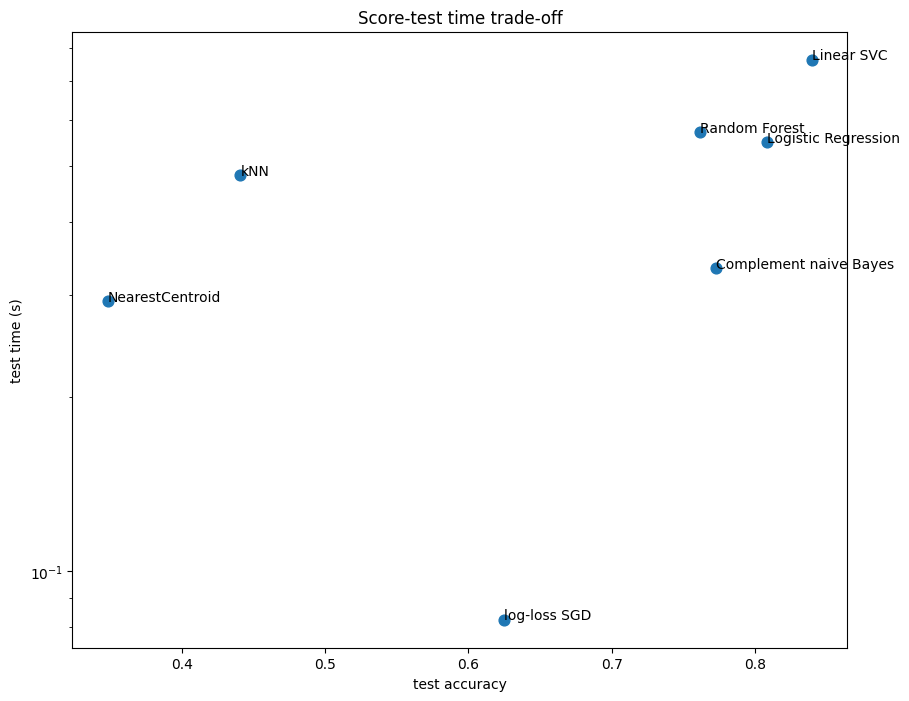

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is a list of dictionaries like this:
# results = [{'classifier': 'Logistic Regression', 'accuracy': 0.85}, ...]

# Extract the classifier names and accuracy scores
clf_names = [result['classifier'] for result in results]
score = [result['accuracy'] for result in results]

# Placeholder for training and test times (you'll need to populate these)
training_time = np.random.rand(len(results))  # Replace with actual training times
test_time = np.random.rand(len(results))  # Replace with actual test times

# Create the plots
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(score, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)

fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(score, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

# Annotate the points with classifier names
for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

plt.show()  # Display the plots